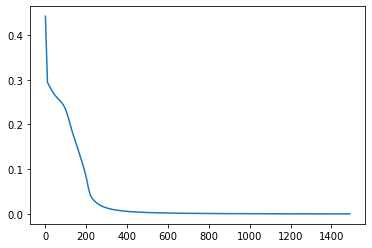

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Activation function
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Derivative of sigmoid
def sigmoid_derivative(p):
    return p * (1 - p)

# Neural Network class
class NeuralNetwork:
    def __init__(self, x,y):
        self.input = x
        self.weights1= np.random.rand(self.input.shape[1],10) # considering we have 4 nodes in the hidden layer
        self.weights2 = np.random.rand(10,1)
        self.y = y
        self.output = np. zeros(y.shape)
        
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        return self.layer2
        
    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, 2*(self.y -self.output)*sigmoid_derivative(self.output))
        d_weights1 = np.dot(self.input.T, np.dot(2*(self.y -self.output)*sigmoid_derivative(self.output), self.weights2.T)*sigmoid_derivative(self.layer1))
    
        self.weights1 += d_weights1
        self.weights2 += d_weights2

    def train(self, x, y):
        self.output = self.feedforward()
        self.backprop()

    def predict(self,x):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        return self.layer2

# Each row is a training example, each column is a feature  [X1, X2, X3]
x_train=np.array(([0,0,1],[0,1,1],[1,0,1],[1,1,1]), dtype=float)
y_train=np.array(([0],[1],[1],[0]), dtype=float)

NN = NeuralNetwork(x_train,y_train)
iteracion = []
error = []

for i in range(1500): # trains the NN 1,000 times
    if i % 10 ==0:
        iteracion.append(i)
        error.append(np.mean(np.square(y_train-NN.feedforward())))
  
    NN.train(x_train, y_train)
    
plt.plot(iteracion,error)
